In [1]:
# ---------- IMPORT LIBRARIES ----------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score 

import graphviz

In [3]:
# ---------- FUNCTIONS ----------------------

In [4]:
def preprocess(dataTarget):
    le = preprocessing.LabelEncoder()
    le.fit(dataTarget)
    class_labels = le.transform(dataTarget)
    
    return class_labels

In [5]:
def preprocessData(data):
    data = data.replace('Unknown', np.nan)
    data.dropna(inplace=True)
    
    return data

In [6]:
def buildDt(dataAttrs, dataTarget):
    #construct decision tree
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(dataAttrs, dataTarget)
    
    return clf

In [7]:
def printPred(df, testX, testY):
    predictions = df.predict(testX)
    print(metrics.classification_report(testY, predictions))

In [8]:
def drawGraph(clf, X, Y):
    dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names =X.columns,
                                class_names= Y,
                                filled = True,
                                rounded= False,
                                special_characters = True
                               )
    graph = graphviz.Source(dot_data)
    return graph

In [9]:
def predict(df, testX):
    prediction = df.predict(testX)
    return prediction

In [10]:
def printAccuracy(clf, testX, testY):
    prediction = predict(clf, testX)
    accuracy = accuracy_score(testY, prediction)
    print(accuracy)

In [11]:
def getAccuracy(clf, testX, testY):
    prediction = predict(clf, testX)
    accuracy = accuracy_score(testY, prediction)
    return accuracy

In [12]:
# ---------- TRYING OUT SCRIPTS ----------------------

In [14]:
#SCRIPT FOR BACKWARD SUBSET FEATURE SELECTION - ONE AT THE TIME 
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

acc_score = []

propertyData = pd.read_csv("property_prices.csv")

propertyData = preprocessData(propertyData)

propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]

for attr in attribute: 

    Y = propertyData['lowBand']
    X = propertyData.drop(columns=['id','lowBand', 'highBand','price_bands', attr])

    XE = pd.get_dummies(X)
    trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

    le = preprocessing.LabelEncoder()
    le.fit(trainY)
    class_labels = le.inverse_transform([0,1,2,3,4,5,6])

    clf = buildDt(trainX, trainY)
    accuracy = getAccuracy(clf, testX, testY)
    acc_score.append(accuracy)


C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

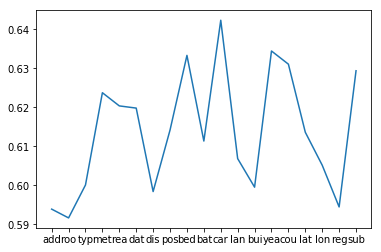

In [15]:
#PRINTING THE ACCURACY SCORE FOR EACH ATTRIBUTE, IF HIGH = REMOVE 
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

attr = []
for a in attribute:
    attr.append(a[:3])
    
fig = plt.figure()
fig = plt.plot(attr, acc_score)

In [17]:
#SCRIPT FOR SEVERAL ITERATIONS OF BACKWARD SUBSET FEATURE SELECTION
import copy
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

droppedColumns = ['id','lowBand', 'highBand','price_bands']

previous_accuracy = 0

propertyData = pd.read_csv("property_prices.csv")

propertyData = preprocessData(propertyData)

propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]
        
while True:
    acc_score = []
    
    for attr in attribute: 

        dropCopy = copy.copy(droppedColumns)
        dropCopy.extend([attr])
        
        Y = propertyData['lowBand']
        X = propertyData.drop(columns=dropCopy)
        
        XE = pd.get_dummies(X)
        trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

        le = preprocessing.LabelEncoder()
        le.fit(trainY)
        class_labels = le.inverse_transform([0,1,2,3,4,5,6])

        clf = buildDt(trainX, trainY)
        accuracy = getAccuracy(clf, testX, testY)
        acc_score.append(accuracy)

    max_index = 0
    for i in range(len(acc_score)):
        if(acc_score[i] > acc_score[max_index]):
            max_index = i

    droppedColumns.append(attribute[max_index])
    attribute.pop(max_index)
    current_accuracy = acc_score[max_index]
    if(current_accuracy < previous_accuracy):
        break
    else:
        previous_accuracy = current_accuracy
    


C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [18]:
#Printing the attributes we are left with 
attribute

['address',
 'type',
 'method',
 'realestate_agent',
 'date',
 'distance',
 'postcode',
 'bedrooms',
 'car_parks',
 'landsize',
 'building_area',
 'year_built',
 'council_area',
 'lattitude',
 'region_name',
 'suburb_property_count']

In [19]:
#Printing the attributes that were dropped
droppedColumns

['id',
 'lowBand',
 'highBand',
 'price_bands',
 'bathrooms',
 'rooms',
 'longtitude']

In [20]:
#Printing the accuracy before the script stopped
previous_accuracy

0.640607424071991

In [21]:
# ---------- VISUALIZING DATA ----------------------

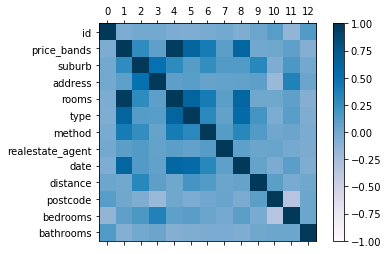

In [22]:
#visualizing correlation plot
correlations = propertyData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(propertyData.columns, minor = True)
ax.set_yticklabels(propertyData.columns)
plt.show()

In [23]:
# ---------- PREPROCESS DATA ----------------------

In [24]:
propertyData = pd.read_csv("property_prices.csv")

propertyData = preprocessData(propertyData)

propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]

In [25]:
# ---------- FEATURE SELECTION ----------------------

In [26]:
#BASIC: NO FEATURES SELECTED

In [33]:
Y = propertyData['lowBand']
X = propertyData.drop(columns=['id','lowBand', 'highBand', 'price_bands'])

In [34]:
XE = pd.get_dummies(X)

trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

le = preprocessing.LabelEncoder()
le.fit(trainY)
class_labels = le.inverse_transform([0,1,2,3,4,5,6])
print(le.transform(trainY))
print(class_labels)

clf = buildDt(trainX, trainY)
printPred(clf, testX, testY)
printAccuracy(clf, testX, testY)

C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4 5 2 ... 1 1 1]
['0' '1' '2' '200' '400' '600' '800']
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.76      0.74      0.75       640
          2       0.71      0.62      0.66       156
        200       0.53      0.58      0.56        53
        400       0.58      0.61      0.59       258
        600       0.53      0.49      0.51       386
        800       0.41      0.48      0.44       284

avg / total       0.61      0.61      0.61      1778

0.6079865016872891


In [40]:
#VARIANCE THRESHOLD

In [41]:
Y = propertyData['lowBand']
X = propertyData.drop(columns=['id','lowBand', 'highBand', 'price_bands'])

XE = pd.get_dummies(X)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(XE)

trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

le = preprocessing.LabelEncoder()
le.fit(trainY)
class_labels = le.inverse_transform([0,1,2,3,4,5,6])
print(le.transform(trainY))
print(class_labels)

clf = buildDt(trainX, trainY)
printPred(clf, testX, testY)
printAccuracy(clf, testX, testY)

C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 2 5 ... 1 5 5]
['0' '1' '2' '200' '400' '600' '800']
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.76      0.76      0.76       592
          2       0.65      0.63      0.64       145
        200       0.44      0.50      0.47        58
        400       0.58      0.54      0.56       308
        600       0.54      0.51      0.52       399
        800       0.44      0.50      0.47       274

avg / total       0.61      0.61      0.61      1778

0.6062992125984252


In [42]:
#FEATURE IMPORTANCE + RANDOM FOREST REGRESSOR

In [43]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

names = propertyData[:1]
rf = RandomForestRegressor()
rf.fit(XE, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.1835, 'realestate_agent'), (0.1033, 'distance'), (0.0858, 'price_bands'), (0.0823, 'postcode'), (0.0772, 'date'), (0.0555, 'method'), (0.0223, 'suburb'), (0.0115, 'id'), (0.0104, 'bedrooms'), (0.0101, 'address'), (0.0072, 'rooms'), (0.0065, 'type'), (0.0006, 'car_parks'), (0.0002, 'bathrooms'), (0.0001, 'region_name'), (0.0001, 'highBand'), (0.0, 'year_built'), (0.0, 'suburb_property_count'), (0.0, 'lowBand'), (0.0, 'longtitude'), (0.0, 'lattitude'), (0.0, 'landsize'), (0.0, 'council_area'), (0.0, 'building_area')]


In [44]:
#SELECT K BEST

In [48]:
#ValueError: Input X must be non-negative.

'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(XE, Y)
features = fit.transform(XE)'''

ValueError: Input X must be non-negative.